## SOC 210B Assignment 1
_M. Nolan Gray_

In [1]:
#Prep work: importing libraries, dataset, checking it, etc.
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dtafile = './Data/covid.dta'

In [3]:
df = pd.read_stata(dtafile)
#Let's see what we're working with here
df.head(5)

,iso_code,location,total_deaths_per_million,total_vaccinations_per_hundred,median_age,gdp_per_capita
0,AFG,Afghanistan,184.936005,NaN,18.600000,1803.987061
1,ALB,Albania,1122.197998,NaN,38.000000,11803.430664
2,DZA,Algeria,141.427002,NaN,29.100000,13913.838867
3,AND,Andorra,1822.788940,NaN,NaN,NaN
4,AGO,Angola,52.721001,NaN,16.799999,5819.495117


In [4]:
df.tail(5)

,iso_code,location,total_deaths_per_million,total_vaccinations_per_hundred,median_age,gdp_per_capita
210,VNM,Vietnam,340.993988,NaN,32.599998,6171.883789
211,WLF,Wallis and Futuna,630.971985,NaN,NaN,NaN
212,YEM,Yemen,65.101997,NaN,20.299999,1479.146973
213,ZMB,Zambia,199.358994,9.6,17.700001,3689.250977
214,ZWE,Zimbabwe,337.393005,NaN,19.600000,1899.775024


### Question 1

<AxesSubplot:xlabel='median_age', ylabel='total_deaths_per_million'>

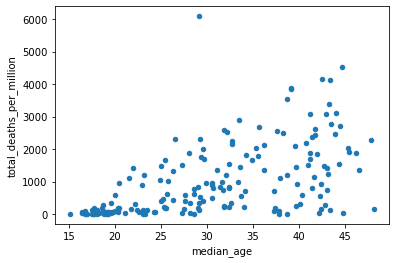

In [5]:
df.plot.scatter(x='median_age',y='total_deaths_per_million')

#### Question 1a

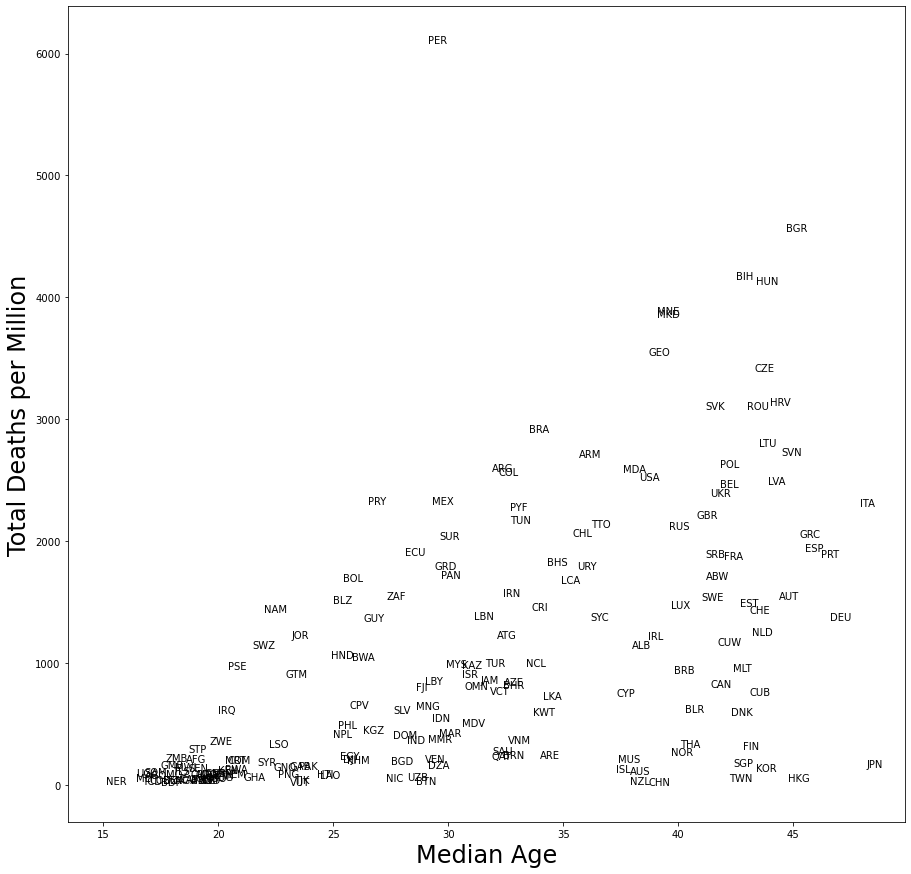

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x=df['median_age'],y=df['total_deaths_per_million'],c='White')
ax.set_xlabel('Median Age',fontdict={'fontsize':24})
ax.set_ylabel('Total Deaths per Million',fontdict={'fontsize':24})
for idx, row in df.iterrows():
    ax.annotate(row['iso_code'],(row['median_age'],row['total_deaths_per_million']))
plt.show()

### Question 2

In [7]:
#This library makes the process super easy.
import seaborn as sns

<AxesSubplot:xlabel='median_age', ylabel='total_deaths_per_million'>

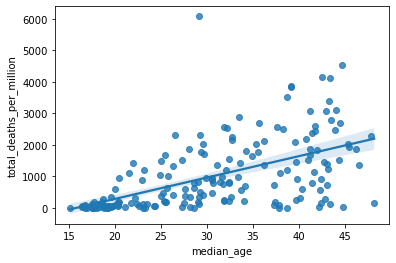

In [8]:
sns.regplot(x='median_age',y='total_deaths_per_million', data=df)

Comparing against the labeled scatterplot above: <b>Peru</b> is an extreme outlier, while <b>Italy</b> falls almost exaclt yon the line of best fit.

### Question 3

In [9]:
import statsmodels.api as sm
import numpy as np

In [10]:
# There were 'NA' entries that prevented the analysis, had to drop them!
df4 = df.dropna(subset=['median_age', 'total_deaths_per_million'])
df4.shape

(183, 6)

In [11]:
X = df4[['median_age']]
y = df4['total_deaths_per_million']
X = sm.add_constant(X)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total_deaths_per_million   R-squared:                       0.314
Model:                                  OLS   Adj. R-squared:                  0.311
Method:                       Least Squares   F-statistic:                     82.97
Date:                      Thu, 13 Jan 2022   Prob (F-statistic):           1.54e-16
Time:                              05:57:32   Log-Likelihood:                -1507.6
No. Observations:                       183   AIC:                             3019.
Df Residuals:                           181   BIC:                             3026.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1068.3029    236.984     -4.508      0.000   -1535.910    -600.696
median_age    67.8181      7.445      9.109      0.000      53.128      82.509
==============================================================================
Omnibus:                       64.595   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.685
Skew:                           1.320   Prob(JB):                     1.83e-56
Kurtosis:                       8.166   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's run this for the US, which has a median age of 38.3.
-1,068.3+67.8(38.8)= <b>1,331.82</b> 

Let's check that against the actual figure...

In [13]:
print(df.loc[df['location'] == 'United States'])

    iso_code       location  total_deaths_per_million  \
204      USA  United States                2499.48999   

     total_vaccinations_per_hundred  median_age  gdp_per_capita  
204                      154.770004   38.299999    54225.445312  


So purely based on our country's age, our total deaths per million should have been lower, suggesting that other variables are at play.